In [1]:
# Importing the basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Getting the list of files
skater_folder = "../skaters/"
skater_files = os.listdir(skater_folder)
team_folder = "../tmstats/"
team_files = os.listdir(team_folder)
print(team_files)
print(skater_files)

['2000_2001_tmstats.csv', '2001_2002_tmstats.csv', '2002_2003_tmstats.csv', '2003_2004_tmstats.csv', '2005_2006_tmstats.csv', '2006_2007_tmstats.csv', '2007_2008_tmstats.csv', '2008_2009_tmstats.csv', '2009_2010_tmstats.csv', '2010_2011_tmstats.csv', '2011_2012_tmstats.csv', '2012_2013_tmstats.csv', '2013_2014_tmstats.csv', '2014_2015_tmstats.csv', '2015_2016_tmstats.csv', '2016_2017_tmstats.csv', '2017_2018_tmstats.csv', '2018_2019_tmstats.csv', '2019_2020_tmstats.csv', '2020_2021_tmstats.csv', '2021_2022_tmstats.csv']
['2010_2011_skater.csv', '2011_2012_skater.csv', '2012_2013_skater.csv', '2013_2014_skater.csv', '2014_2015_skater.csv', '2015_2016_skater.csv', '2016_2017_skater.csv', '2017_2018_skater.csv', '2018_2019_skater.csv', '2019_2020_skater.csv', '2020_2021_skater.csv', '2021_2022_skater.csv']


In [3]:
# This function pulls the win rates from a given team stats dataframe and 
# returns a dictionary with team abbreviations as keys and win rates as values.
# This is used in the next code chunk, were I build one giant skater dataframe
# with all years and add the team's win rate as a column.

abbrevs = pd.read_csv("../team_abbreviations.csv", header=None,names=['abbreviation','full_name'])

def team_wins_dict(teams_df):
    twd = {}
    for index,row in abbrevs.iterrows():
        full_name = row['full_name']
        name_list = full_name.split()
        mascot = name_list[-1].split('/')[-1]
        for t_index,t_row in teams_df.iterrows():
            if "original" in mascot:
                break
            elif mascot in t_row["Unnamed: 1"]:
                winrate = t_row['W']/t_row['GP']
                twd[row['abbreviation']]= winrate
                break
    return twd
        


In [4]:
# Here's an example:

exteam = pd.read_csv(team_folder+team_files[7])
team_wins_dict(exteam)


{'AFM': 0.5609756097560976,
 'ANA': 0.5121951219512195,
 'ARI': 0.43902439024390244,
 'ATL': 0.4268292682926829,
 'BOS': 0.6463414634146342,
 'BUF': 0.5,
 'CAR': 0.5487804878048781,
 'CBJ': 0.5,
 'CGY': 0.5609756097560976,
 'CHI': 0.5609756097560976,
 'COL': 0.3902439024390244,
 'DAL': 0.43902439024390244,
 'DET': 0.6219512195121951,
 'EDM': 0.4634146341463415,
 'FLA': 0.5,
 'LAK': 0.4146341463414634,
 'MIN': 0.4878048780487805,
 'MNS': 0.43902439024390244,
 'MTL': 0.5,
 'NJD': 0.6219512195121951,
 'NSH': 0.4878048780487805,
 'NYI': 0.3170731707317073,
 'NYR': 0.524390243902439,
 'OTT': 0.43902439024390244,
 'PHI': 0.5365853658536586,
 'PHX': 0.43902439024390244,
 'PIT': 0.5487804878048781,
 'SJS': 0.6463414634146342,
 'STL': 0.5,
 'TBL': 0.2926829268292683,
 'TOR': 0.4146341463414634,
 'VAN': 0.5487804878048781,
 'WSH': 0.6097560975609756}

In [5]:
# Building a dataframe with all of the player data

all_skaters_data = pd.DataFrame()
for i in range(len(skater_files)):
    skaters = pd.read_csv(skater_folder+skater_files[i])
    teams = pd.read_csv(team_folder+team_files[i+9])
    wins_dict = team_wins_dict(teams)
#    if i == 4:
#        continue
    winrates = np.zeros(len(skaters))
    years = np.zeros(len(skaters))
    for ind, row in skaters.iterrows():
        thisteam=row['Tm']
        if 'TOT' in thisteam:
            winrates[ind] = float('nan')
        elif 'VEG' in thisteam: # Vegas changed their abbreviation a few years ago
            winrates[ind] = wins_dict['VGK']
        else:
            winrates[ind] = wins_dict[thisteam]
        years[ind] = i+2010
    skaters['Winrate'] = winrates
    skaters['Year'] = i+2010
    all_skaters_data = pd.concat([all_skaters_data,skaters],
                                ignore_index=True)
        

In [24]:
all_skaters_data.columns[6:-3]

Index(['G', 'A', 'PTS', '+/-', 'PIM', 'PS', 'EV', 'PP', 'SH', 'GW', 'EV.1',
       'PP.1', 'SH.1', 'S', 'S%', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL',
       'FO%'],
      dtype='object')

In [25]:
from scipy.stats import linregress
# Using this for now to get a quick and dirty p-value for each player stat
# Will try to build a more complex linear model in sklearn later

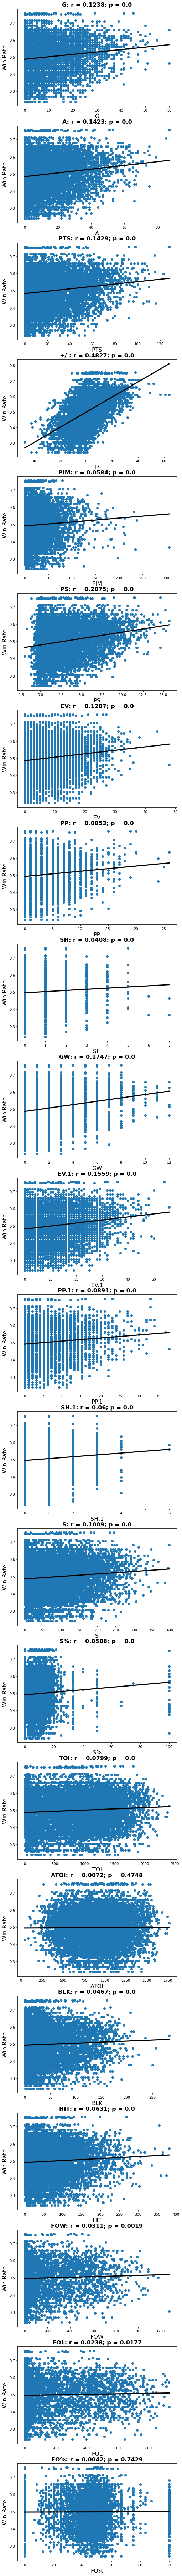

In [72]:
# Making Scatter Plots of everything

fig, axs = plt.subplots(len(all_skaters_data.columns[6:-3]), figsize=(8,6*22))

for i, col in enumerate(all_skaters_data.columns[6:-3]):
    if 'ATOI' in col: # This one is given as a string for some reason
        x = np.zeros(len(all_skaters_data[col]))
        for j, time in enumerate(all_skaters_data[col].values):
            timelist = time.split(':')
            x[j] = 60*float(timelist[0])+float(timelist[1])
    else:
        x = all_skaters_data[col].values
    y = all_skaters_data["Winrate"].values
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = linregress(x[mask],y[mask])
    x_hat = np.linspace(np.nanmin(x),np.nanmax(x), num=100)
    y_hat = x_hat*slope + intercept
    axs[i].scatter(x,y)
    axs[i].plot(x_hat,y_hat,color='black',linewidth=3)
    axs[i].set_title(str(col)+': r = '+str(round(r_value,4))+'; p = '+str(round(p_value,4)),fontsize=16,fontweight='bold')
    axs[i].set_xlabel(col, fontsize=16)
    axs[i].set_ylabel("Win Rate",fontsize=16)

nan